# Задание 2.1: поиск элемента в неотсортированном массиве

### Импортируем необходимые библиотеки:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import timeit
from tqdm import tqdm_notebook

plt.style.use(style='seaborn-white')

### Подготовим массив с размерностями массивов для последующих тестов:

In [2]:
size_values = [int(i * 10**i) for i in np.arange(1, 3.5, 0.25)]
print('Будут использованы массивы следующих размеров: ', size_values)

Будут использованы массивы следующих размеров:  [10, 22, 47, 98, 200, 400, 790, 1546, 3000, 5779]


# Линейный поиск
## Реализация:

In [3]:
def linear_search(array, label):
    for index, value in enumerate(array):
        if value == label:
            return index
    return 'Not found'

## Замер производительности алгоритма
Тест производительности является итеративным и выполняется следующим образом:
Берется значение размерности массива из массива `size_values`. Затем предварительно генерируется массив случайных чисел величиной от `0` до `i`, в количестве `i` чисел, где `i` - это величина размерности массива на данном этапе. К примеру, при размере массива в 200 элементов, будет сгенерированно 200 чисел величиной от 0 до 200. Процедура поиска элемента в сгенерированном массиве проводится 1000 раз, из выполненных измерений в расчет берется результат с наименьшим значением времени. Эта процедура нахождения времени выполнения на случайном массиве проводится 100 раз. Все 100 результатов замерений скорости выполнения алгоритма на заданной размерности при случайном наборе чисел сохраняется для последующего анализа.<br>
Итого мы имеем словарь, в котором ключом является количество элементов в массиве. Значениями для ключа является последовательность из 100 значений, каждое из которых характеризует время выполнения алгоритма, высчитанное на основе 1000 замеров одного и того же случая.

In [4]:
iter_number = 1000
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("linear_search(a, label)", 
                   repeat=100, 
                   setup="a = np.random.randint(0, i, i); label = np.random.randint(0, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [5]:
keys_casual = list(results.keys())
values_casual = np.array(list(results.values())).mean(axis=1)
deviation_casual = np.array(list(results.values())).std(axis=1)
results_casual = list(zip(keys_casual, values_casual, deviation_casual))

In [6]:
print('Время одной операции линейного поиска:')
for i in results_casual:
    print('На {:4d} элементах: {:.7f} ± {:.7f};'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции линейного поиска:
На   10 элементах: 0.0019181 ± 0.0009174; Разброс замеров: 47.83%
На   22 элементах: 0.0031764 ± 0.0018232; Разброс замеров: 57.40%
На   47 элементах: 0.0063759 ± 0.0035383; Разброс замеров: 55.50%
На   98 элементах: 0.0123975 ± 0.0065385; Разброс замеров: 52.74%
На  200 элементах: 0.0245789 ± 0.0139822; Разброс замеров: 56.89%
На  400 элементах: 0.0505881 ± 0.0316091; Разброс замеров: 62.48%
На  790 элементах: 0.1032996 ± 0.0576258; Разброс замеров: 55.79%
На 1546 элементах: 0.2200903 ± 0.1079918; Разброс замеров: 49.07%
На 3000 элементах: 0.3966259 ± 0.2613119; Разброс замеров: 65.88%
На 5779 элементах: 0.7874909 ± 0.4230048; Разброс замеров: 53.72%


### Вывод:
Из результатов замерений наглядно видно, что скорость работы линейного поиска крайне нестабильна и сильно зависит от распределения случайных величин в массиве. Очевидно, что время работы такого алгоритма будет от минимального времени, за которую будет происходить лишь 1 сравнение (если искомый элемент 1-ый в массиве), до полного прохода и сравнения `n` элементов в массиве (если искомый элемент последний или вовсе отсутствует).

# Быстрый линейный поиск
## Реализация:

In [7]:
def fast_linear_search(array, label):
    size = len(array)
    array = list(array)
    array.append(label)
    for index, value in enumerate(array):
        if value == label:
            if index == size + 1:
                return 'Not found'                
            return index

### Замер производительности алгоритма
Принцип замеров полностью аналогичен способу, описанному выше для алгоритма линейного поиска.

In [8]:
iter_number = 1000
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("fast_linear_search(a, label)", 
                   repeat=100, 
                   setup="a = np.random.randint(0, i, i); label = np.random.randint(0, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [9]:
keys_fast = list(results.keys())
values_fast = np.array(list(results.values())).mean(axis=1)
deviation_fast = np.array(list(results.values())).std(axis=1)
results_fast = list(zip(keys_fast, values_fast, deviation_fast))

In [10]:
print('Время одной операции быстрого линейного поиска:')
for i in results_fast:
    print('На {:4d} элементах: {:.7f} ± {:.7f};'.format(i[0], i[1], i[2]), end=' ')
    print('Погрешность: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции быстрого линейного поиска:
На   10 элементах: 0.0028268 ± 0.0005868; Погрешность: 20.76%
На   22 элементах: 0.0042807 ± 0.0013180; Погрешность: 30.79%
На   47 элементах: 0.0074050 ± 0.0027049; Погрешность: 36.53%
На   98 элементах: 0.0147767 ± 0.0056306; Погрешность: 38.10%
На  200 элементах: 0.0302012 ± 0.0123070; Погрешность: 40.75%
На  400 элементах: 0.0556779 ± 0.0239876; Погрешность: 43.08%
На  790 элементах: 0.1055070 ± 0.0469827; Погрешность: 44.53%
На 1546 элементах: 0.2196794 ± 0.1147717; Погрешность: 52.25%
На 3000 элементах: 0.4498689 ± 0.2058209; Погрешность: 45.75%
На 5779 элементах: 0.8532117 ± 0.3613714; Погрешность: 42.35%


### Выводы:
Исходя из результатов замеров, мы можем сделать выводы, схожие с выводами для линейного поиска: алгоритм нестабилен, очень сильно зависит от распределения чисел в сгенерированном массиве, зависимость времени выполнения от расположения чисел очевидна.

# Сравнение производительности алгоритмов
Построим графики каждого из алгоритмов, основываясь на данных произведенных замеров.
Для данных алгоритмов крайне велика степень разброса замеренных значений, поэтому было принято решение не только построить усредненное значение каждого из показателей, но также наглядно показать стандартное отклонение для замеренных значений на каждой из размерности.<br><br>
## __Условные обозначения:__
* синяя сплошная линия - время выполнения алгоритма
* темно-синяя пунктирная линия - сравнительное время выполнения другого алгоритма (для наглядности сравнения)
* светло-голубой фон - стандартное отклонение времени выполнения

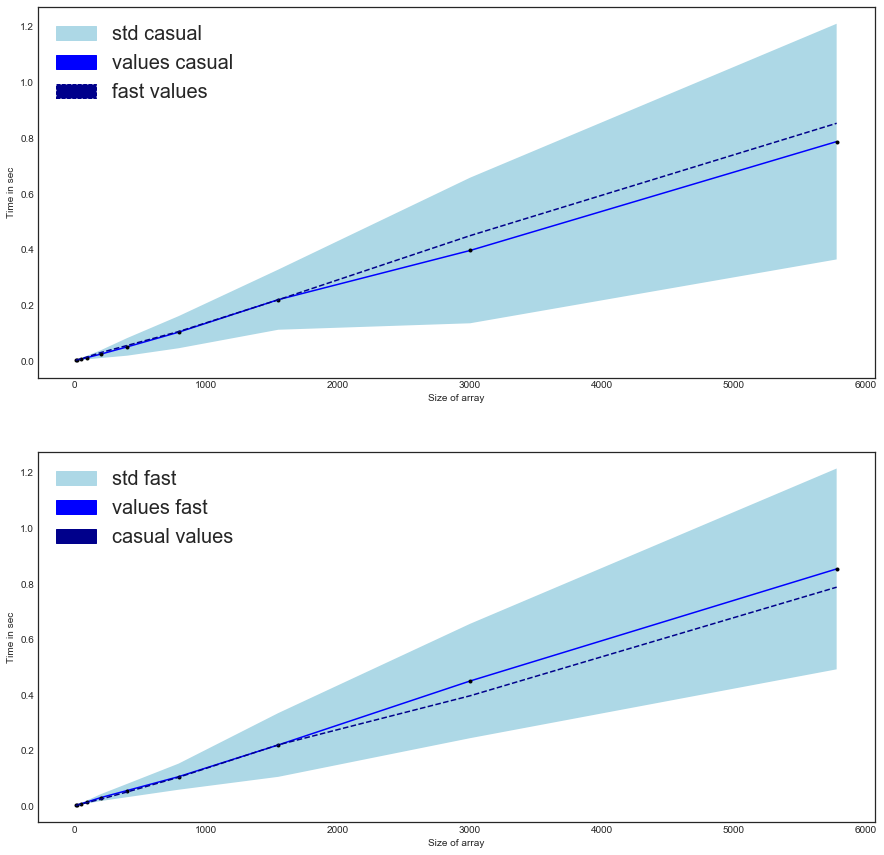

In [11]:
plt.figure(1, figsize=(15, 15))
plt.subplot(211)
plt.plot(size_values, values_casual, 'b-')
plt.plot(size_values, values_casual, 'k.')
plt.plot(size_values, values_fast, color='darkblue', linestyle='dashed')
plt.xlabel('Size of array')
plt.ylabel('Time in sec')
plt.fill_between(size_values, 
                 values_casual+deviation_casual, 
                 values_casual-deviation_casual, 
                 interpolate=True, 
                 facecolor='lightblue')
std_patch = mpatches.Patch(color='lightblue', label='std casual')
values_patch = mpatches.Patch(color='blue', label='values casual')
fast_patch = mpatches.Patch(color='darkblue', linestyle='dashed', label='fast values')
plt.legend(handles=[std_patch, values_patch, fast_patch], loc=2, fontsize=20)

plt.subplot(212)
plt.plot(size_values, values_fast, 'b-')
plt.plot(size_values, values_fast, 'k.')
plt.plot(size_values, values_casual, color='darkblue', linestyle='dashed')
plt.xlabel('Size of array')
plt.ylabel('Time in sec')
plt.fill_between(size_values, 
                 values_fast + deviation_fast, 
                 values_fast - deviation_fast, 
                 interpolate=True, 
                 facecolor='lightblue')
std_patch = mpatches.Patch(color='lightblue', label='std fast')
values_patch = mpatches.Patch(color='blue', label='values fast')
casual_patch = mpatches.Patch(color='darkblue', label='casual values')
plt.legend(handles=[std_patch, values_patch, casual_patch], loc=2, fontsize=20)

plt.show()

## Выводы:
Из графиков наглядно видно, что метод быстрого линейного поиска не имеет никак преимуществ перед линейным поиском. Фактически, линейный и быстрый линейный поиск работают практически одинаково, различаясь лишь из-за случайности результатов, связанной с сильной зависимостью от распределения данных. Стандартное отклонение показывает, что оба алгоритма работают крайне нестабильно по времени и без предваритльного тщательного анализа данных практически невозможно предсказать время работы алгоритма, которое будет варьироваться от `1` до `N` операций, где `N` - величина массива. Построенные графики подтверждают это предположение, отражая линейность зависимости времени выполнения от количества данных.

# Задание 2.2: поиск элемента в отсортированном массиве

Для начала, введем рассматриваемые размерности массивов, а также создадим массив максимальной из этих величин. Генерация массива случайных чисел в 16 000 000 элементов занимает чрезвычайно много времени (приблизительно 40 секунд), поэтому циклически обновлять этот массив не представляется рациональным. Вместо этого, мы единожды создадим массив максимального размера и будем забирать интересующий нас размер от него. Такой подход существенно сэкономит время подготовки к замеру производительности алгоритмов.

In [12]:
size_values = [i for i in range(10000, 100000, 30000)] \
            + [i for i in range(100000, 10**6, 200000)] \
            + [i for i in range(10**6, 2*10**7, 5*10**6)]
print('Будут использованы массивы следующих размеров: ', size_values)

Будут использованы массивы следующих размеров:  [10000, 40000, 70000, 100000, 300000, 500000, 700000, 900000, 1000000, 6000000, 11000000, 16000000]


In [13]:
maxsize = size_values[-1]
a = sorted(np.random.randint(0, maxsize, maxsize))

Импортируем необходимые библиотеки.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import timeit
from tqdm import tqdm_notebook

plt.style.use(style='seaborn-white')

## Быстрый линейный поиск

### Реализация:

In [15]:
def fast_linear_search(array, label):
    for index, value in enumerate(array):
        if value == label:
            return index
        elif value > label:
            return "Not found"

### Замер производительности алгоритма:

In [16]:
iter_number = 2
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("fast_linear_search(a[:i], label)", 
                   repeat=5, 
                   setup="label = np.random.randint(0, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

In [17]:
keys_fast = list(results.keys())
values_fast = np.array(list(results.values())).mean(axis=1)
deviation_fast = np.array(list(results.values())).std(axis=1)
results_fast = list(zip(keys_fast, values_fast, deviation_fast))

In [18]:
print('Время одной операции быстрого линейного поиска:')
for i in results_fast:
    print('На {:8d} элементах: {:.7f} ± {:.7f};'.format(i[0], i[1], i[2]), end=' ')
    print('Погрешность: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции быстрого линейного поиска:
На    10000 элементах: 0.0049248 ± 0.0016653; Погрешность: 33.81%
На    40000 элементах: 0.0144817 ± 0.0084115; Погрешность: 58.08%
На    70000 элементах: 0.0339901 ± 0.0099241; Погрешность: 29.20%
На   100000 элементах: 0.0286941 ± 0.0127554; Погрешность: 44.45%
На   300000 элементах: 0.1531121 ± 0.0537300; Погрешность: 35.09%
На   500000 элементах: 0.2066743 ± 0.0765031; Погрешность: 37.02%
На   700000 элементах: 0.4168381 ± 0.1909362; Погрешность: 45.81%
На   900000 элементах: 0.5487636 ± 0.1792629; Погрешность: 32.67%
На  1000000 элементах: 0.4477658 ± 0.2388594; Погрешность: 53.34%
На  6000000 элементах: 3.0170194 ± 1.2677026; Погрешность: 42.02%
На 11000000 элементах: 7.7587804 ± 3.9872839; Погрешность: 51.39%
На 16000000 элементах: 9.6946436 ± 5.1547291; Погрешность: 53.17%


## Бинарный поиск

### Реализация:

In [19]:
def binary_search(sorted_list, to_find):
    first = 0
    last = len(sorted_list) - 1
    found = False
    while first <= last and not found:
        mid = (first + last) // 2
        if sorted_list[mid] == to_find:
            found = True
        else:
            if to_find < sorted_list[mid]:
                last = mid - 1
            else:
                first = mid + 1
    if found:
        return mid
    else:
        return "Not found"

### Замер производительности алгоритма:

In [20]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("binary_search(a[:i], label)", 
                   repeat=10, 
                   setup="label = np.random.randint(0, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

In [21]:
keys_binary = list(results.keys())
values_binary = np.array(list(results.values())).mean(axis=1)
deviation_binary = np.array(list(results.values())).std(axis=1)
results_binary = list(zip(keys_binary, values_binary, deviation_binary))

In [22]:
print('Время одной операции бинарного поиска:')
for i in results_binary:
    print('На {:8d} элементах: {:.7f} ± {:.7f};'.format(i[0], i[1], i[2]), end=' ')
    print('Погрешность: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции бинарного поиска:
На    10000 элементах: 0.0011090 ± 0.0001225; Погрешность: 11.05%
На    40000 элементах: 0.0059521 ± 0.0013941; Погрешность: 23.42%
На    70000 элементах: 0.0103571 ± 0.0014457; Погрешность: 13.96%
На   100000 элементах: 0.0167846 ± 0.0021067; Погрешность: 12.55%
На   300000 элементах: 0.0556133 ± 0.0018867; Погрешность: 3.39%
На   500000 элементах: 0.0974966 ± 0.0041902; Погрешность: 4.30%
На   700000 элементах: 0.1312324 ± 0.0021682; Погрешность: 1.65%
На   900000 элементах: 0.1685657 ± 0.0025996; Погрешность: 1.54%
На  1000000 элементах: 0.1893196 ± 0.0020700; Погрешность: 1.09%
На  6000000 элементах: 1.1761464 ± 0.0240957; Погрешность: 2.05%
На 11000000 элементах: 2.1765698 ± 0.0369083; Погрешность: 1.70%
На 16000000 элементах: 3.1200930 ± 0.0273545; Погрешность: 0.88%


## Блочный поиск

### Реализация:

In [23]:
def block_search(sorted_list, to_find):
    first = 0
    last = len(sorted_list) - 1
    step = last // 100
    while first <= last:
        if sorted_list[first + step] > to_find:
            for index, value in enumerate(sorted_list[first:first + step]):
                if value == to_find:
                    return first + index
                else:
                    return "Not found"
        else:
            first += step
    return "Not found"

### Замер производительности алгоритма:

In [24]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("block_search(a[:i], label)", 
                   repeat=10, 
                   setup="label = np.random.randint(0, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

In [25]:
keys_block = list(results.keys())
values_block = np.array(list(results.values())).mean(axis=1)
deviation_block = np.array(list(results.values())).std(axis=1)
results_block = list(zip(keys_block, values_block, deviation_block))

In [26]:
print('Время одной операции блочного поиска:')
for i in results_block:
    print('На {:8d} элементах: {:.7f} ± {:.7f};'.format(i[0], i[1], i[2]), end=' ')
    print('Погрешность: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции блочного поиска:
На    10000 элементах: 0.0012074 ± 0.0001478; Погрешность: 12.24%
На    40000 элементах: 0.0056468 ± 0.0014838; Погрешность: 26.28%
На    70000 элементах: 0.0105862 ± 0.0014750; Погрешность: 13.93%
На   100000 элементах: 0.0169638 ± 0.0015473; Погрешность: 9.12%
На   300000 элементах: 0.0558803 ± 0.0008532; Погрешность: 1.53%
На   500000 элементах: 0.0980349 ± 0.0052081; Погрешность: 5.31%
На   700000 элементах: 0.1423003 ± 0.0027421; Погрешность: 1.93%
На   900000 элементах: 0.1770348 ± 0.0042642; Погрешность: 2.41%
На  1000000 элементах: 0.1930513 ± 0.0031698; Погрешность: 1.64%
На  6000000 элементах: 1.1920765 ± 0.0368821; Погрешность: 3.09%
На 11000000 элементах: 2.1430847 ± 0.0257511; Погрешность: 1.20%
На 16000000 элементах: 3.1250907 ± 0.0432680; Погрешность: 1.38%


## Сравнение производительности алгоритмов

Построим графики каждого из трех алгоритмов вместе, чтобы сравнить их относительно друг друга, а затем сделаем выводы на основании этих результатов.

Отметим, что блочный и бинарный поиск крайне трудноразличимы и практически совпадают на графике даже при полной контрастности цветов. Это легко объяснить некоторым алгоритмическим сходством этих двух алгоритмов, из-за чего их результаты довольно близки друг к другу.

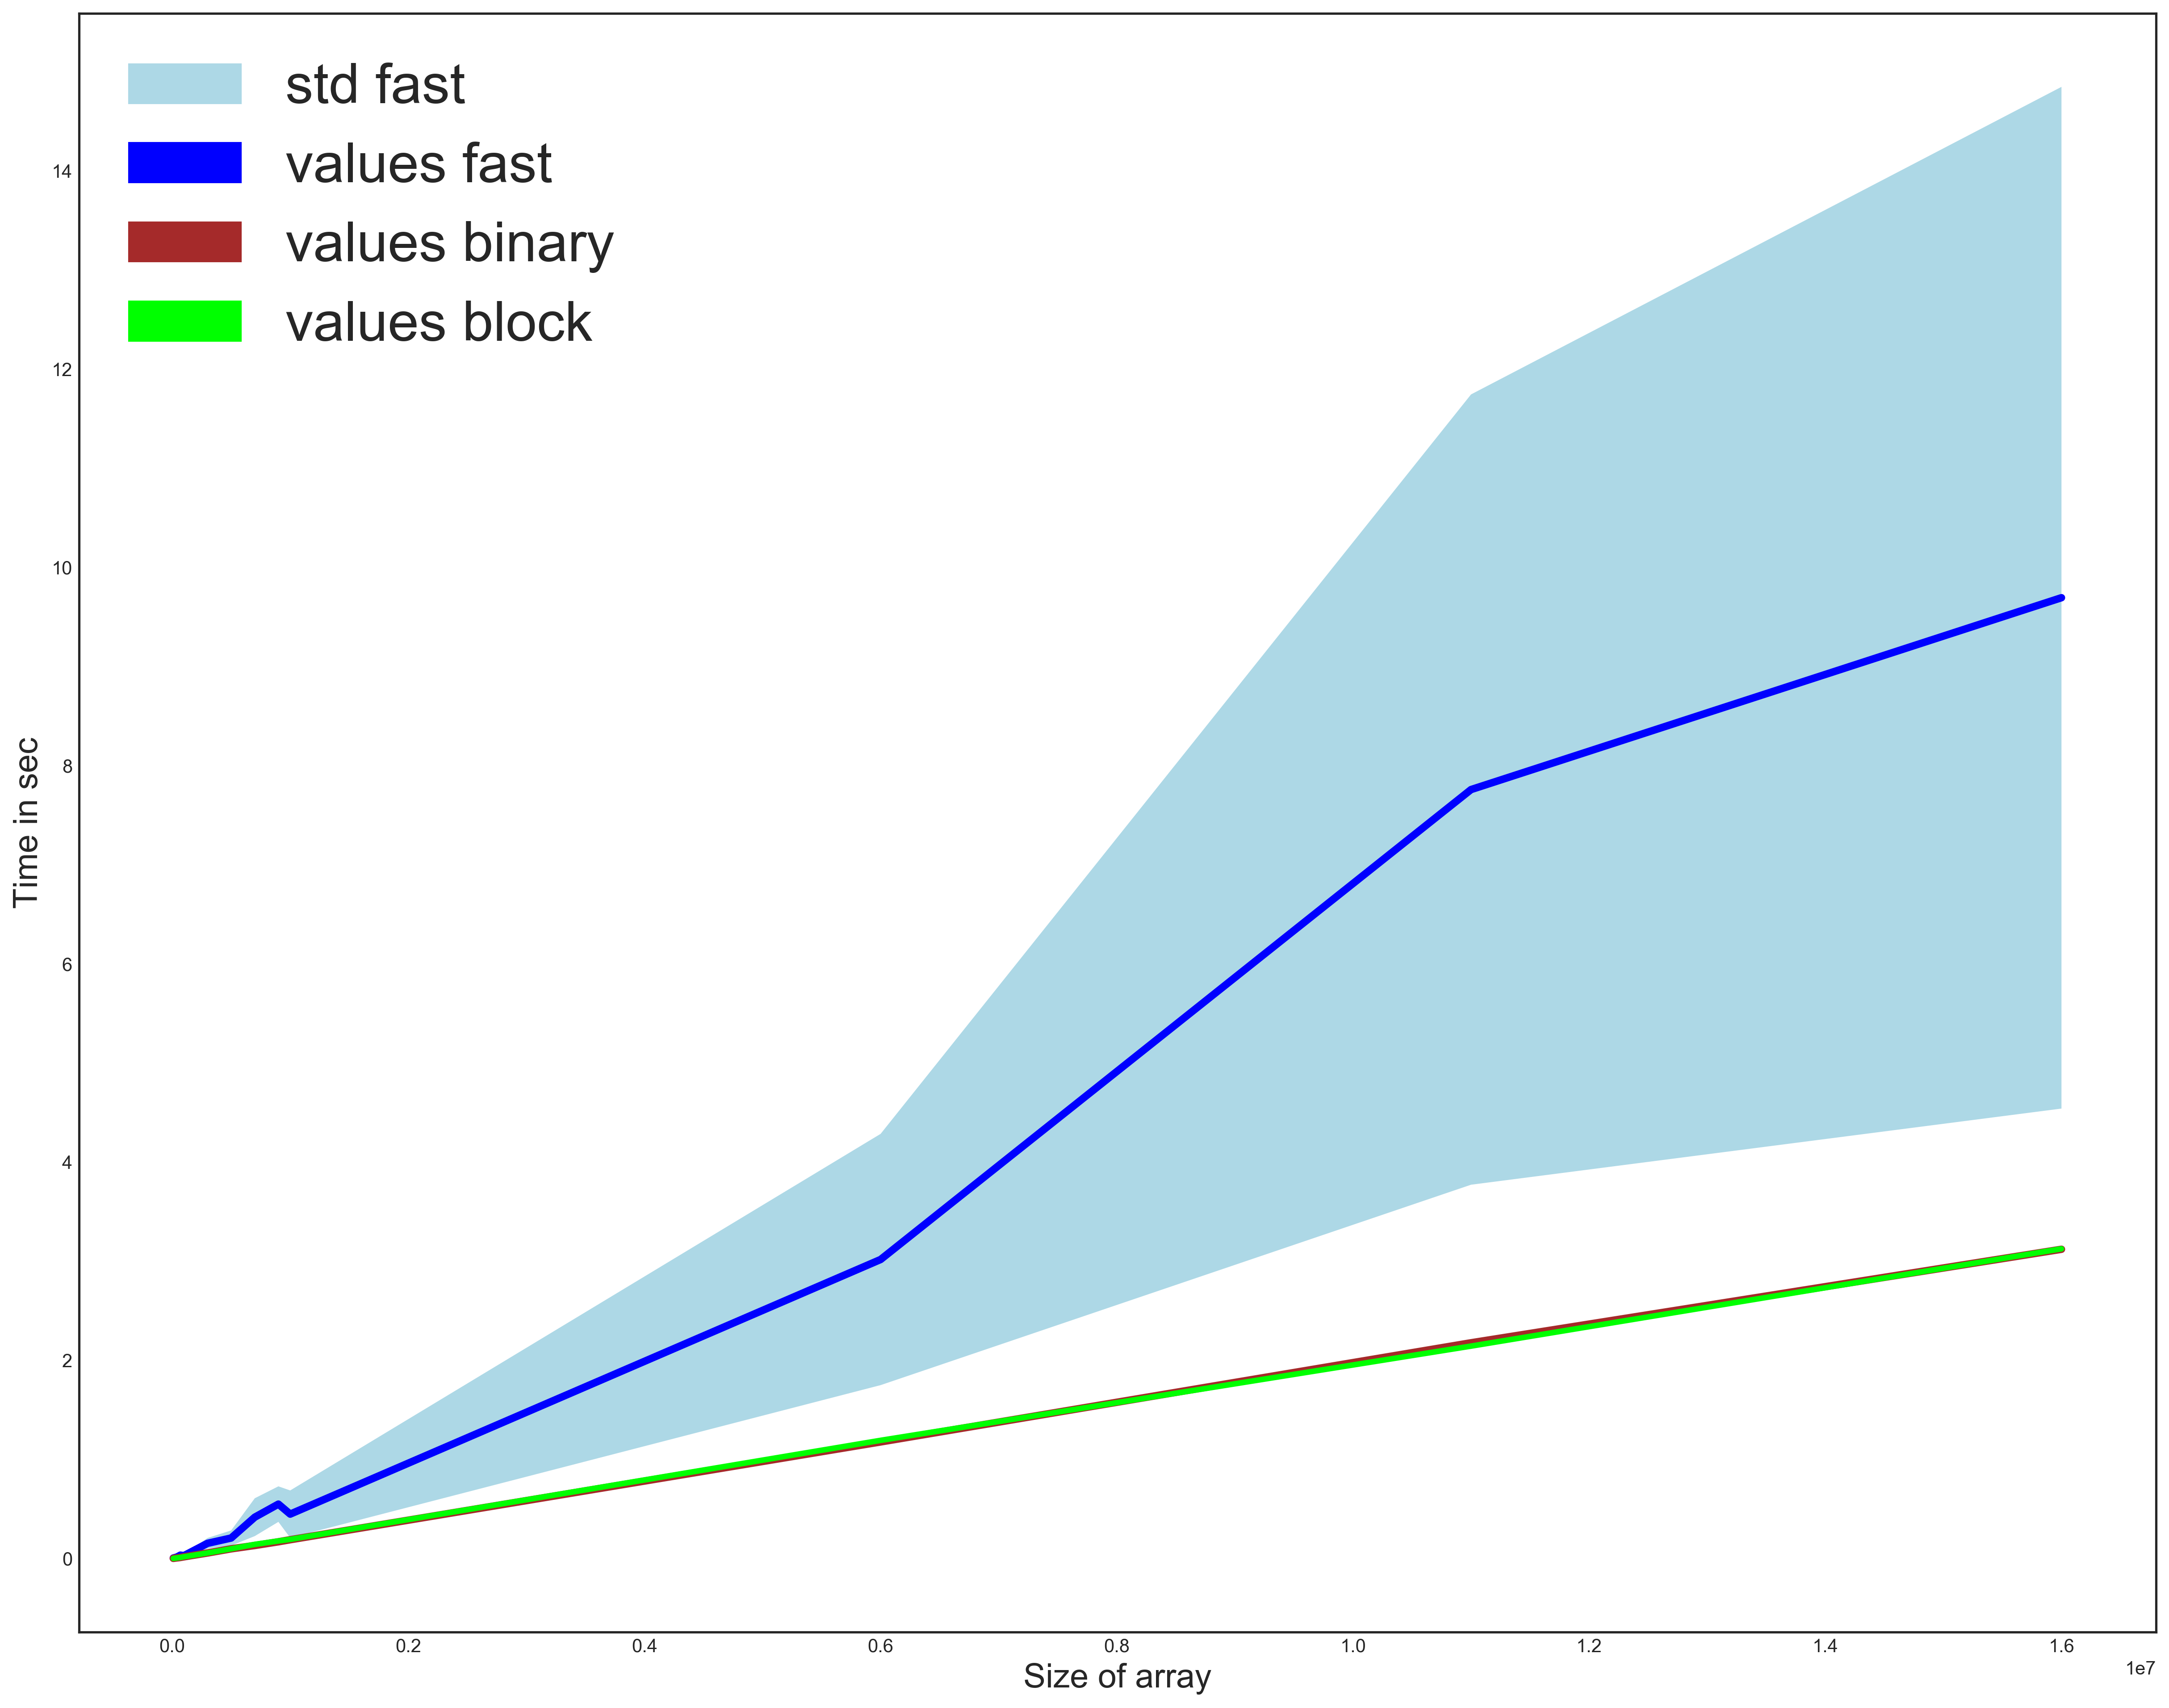

In [27]:
plt.figure(num=1, figsize=(20,16), dpi=300)
""" БЫСТРЫЙ ЛИНЕЙНЫЙ ПОИСК """
plt.plot(size_values, values_fast, 'b-', linewidth=4.0)
plt.xlabel('Size of array', fontsize=18)
plt.ylabel('Time in sec', fontsize=18)
plt.fill_between(size_values, 
                 values_fast + deviation_fast, 
                 values_fast - deviation_fast, 
                 interpolate=True, 
                 facecolor='lightblue')

""" БИНАРНЫЙ ПОИСК """
plt.plot(size_values, values_binary, '-', linewidth=4.0, color='brown')

""" БЛОЧНЫЙ ПОИСК """
plt.plot(size_values, values_block, '-', linewidth=3.0, color='lime')


std_patch = mpatches.Patch(color='lightblue', label='std fast')
values_fast_patch = mpatches.Patch(color='blue', label='values fast')
values_binary_patch = mpatches.Patch(color='brown', label='values binary')
values_block_patch = mpatches.Patch(color='lime', label='values block')
plt.legend(handles=[std_patch, values_patch, values_binary_patch, values_block_patch], loc=2, fontsize=30)
plt.show()

# Выводы
На графике изображены три кривые, отображающие время выполнения каждого из алгоритмов. Соотвествие цвета кривой алгоритму указано в легенде в левом верхнем углу графика. Светло-голубым цветом помечено нормальное отклонение результата работы алгоритма быстрого линейного поиска. Этот алгоритм является крайне нестабильным, что хорошо видно из результатов замеров, полученных прежде (относительный разброс показателей замеров достигает 50% при тех же размерностях). Бинарный и блочный поиск существенно отличаются от линейного в этом плане, обладая существенной стабильностью, которая легко объясняется математически, исходя из гарантируемого схождения к искомому элементу за меньшее время. Блочный и бинарный поиск довольно трудно различимы по прозводительности, но недостаток блочного поиска в том, что он все же зависим от величины блока, который берется для алгоритма, а величину этого блока необходимо подбирать индивидуально для каждого случая, в зависимости от величины и распределения данных. Бинарный поиск, несмотря на то, что на малом наборе данных из-за большого количества делений массива он склонен показывать не самые лучшие результаты, считается наиболеее стабильным и предельно простым в реализации, из-за чего и применяется чаще других алгоритмов.